In [3]:
# The Correlation Of Social, Family & Academics To Student Alcohol Consumption
# CMSC320 Final Tutorial - Matt Kildea, Steph Farace, John Little

# Introduction
# This project analyzes certain features of students and tries to determine if there
# is a relationship between them and increased alcohol consumption. This is an important
# subject because underage drinking can be very detrimental, especially to high school
# students. Before beginning this project, our group did some research to understand the
# negative effects of underage drinking. While it is hard to predict what causes underage
# drinking, there tend to be some trends in children with trauma or high stress that 
# turn to alcohol at a young age. Part of this project tries to identify if separated 
# parents can add to this stress for children and we try to see if it causes students to
# turn to alcohol. Another part of this project involves identifying trends in students 
# that abuse alcohol at a young age. Some of the questions we ask are, do they do worse
# in school?, do they go out more?, and what age groups drink more?. If we can identify
# some of these trends, we can work to identify students that fit this model and take 
# preventative steps to help them. Some of the resources we used to do research are listed
# below.
# https://pubs.niaaa.nih.gov/publications/AA67/AA67.htm
# https://www.cdc.gov/alcohol/fact-sheets/underage-drinking.htm#:~:text=School%20problems%2C%20such%20as%20higher,such%20as%20hangovers%20or%20illnesses
# https://kidshealth.org/en/teens/alcohol.html#:~:text=Experimentation%20with%20alcohol%20during%20the,good%2C%20reduce%20stress%2C%20and%20relax
#
# The dataset we chose examines the social, gender, and study data from secondary
# school students from two schools in Portugal: Gabriel Pereira and Mousinho da Silveira.
# It also examines their weekday and weekend alcohol consumption. In the original dataset
# there are over 30 data points per person, however we narrow these down to a few that 
# represent the students' social, family, academic, and alcohol consumption patterns. In 
# total there are 395 students that have data collected on them. We work to explore various
# demographics in these students to find correlations with higher alcohol consumption.
# The dataset was pulled from https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

# Aside from learning more about underage drinking, this project aims to teach the reader
# how to collect and clean/organize data, visualize the data and find summary statistics,
# test different data points against themselves, and ultimately train the data by choosing
# a classification algorithm and hyperparameters. 

In [4]:
# Part 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
import statsmodels.api as sm
data = pd.read_csv("student-mat.csv", sep=',')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
# Cleaning data
data = data.drop(columns=["Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "schoolsup", "famsup", "paid", "nursery", "higher", "health", "absences", "G1", "G2", "famsize"])
data
# This dataset initially comes with 33 columns of data. Many of these categories may either do not strongly relate 
# to the focus of our project, or generally seem unlikely do have any type of correlation to our 
# outcome. We remove these columns from our dataframe to keep only the data we intend on analyzing for the project

,school,sex,age,address,Pstatus,studytime,failures,activities,internet,romantic,famrel,freetime,goout,Dalc,Walc,G3
0,GP,F,18,U,A,2,0,no,no,no,4,3,4,1,1,6
1,GP,F,17,U,T,2,0,no,yes,no,5,3,3,1,1,6
2,GP,F,15,U,T,2,3,no,yes,no,4,3,2,2,3,10
3,GP,F,15,U,T,3,0,yes,yes,yes,3,2,2,1,1,15
4,GP,F,16,U,T,2,0,no,no,no,4,3,2,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,A,2,2,no,no,no,5,5,4,4,5,9
391,MS,M,17,U,T,1,0,no,yes,no,2,4,5,3,4,16
392,MS,M,21,R,T,1,3,no,no,no,5,5,3,3,3,7
393,MS,M,18,R,T,1,0,no,yes,no,4,4,1,3,4,10


In [6]:
# Here, we remove all rows that are missing some information from our dataset 
data.dropna()
# Many of the colums have ambiguous names, so we rename them for the sake of clarity
data.rename(columns={'address': 'urbanVsRural', 'famsize' : 'famSize', 'Pstatus': 'parentDivorceStatus', 'romantic' : 'inRelationship', 'Dalc' : 'workdayAlc', 'Walc' : 'weekendAlc', 'G3' : 'finalGrade'}, inplace=True)
data

,school,sex,age,urbanVsRural,parentDivorceStatus,studytime,failures,activities,internet,inRelationship,famrel,freetime,goout,workdayAlc,weekendAlc,finalGrade
0,GP,F,18,U,A,2,0,no,no,no,4,3,4,1,1,6
1,GP,F,17,U,T,2,0,no,yes,no,5,3,3,1,1,6
2,GP,F,15,U,T,2,3,no,yes,no,4,3,2,2,3,10
3,GP,F,15,U,T,3,0,yes,yes,yes,3,2,2,1,1,15
4,GP,F,16,U,T,2,0,no,no,no,4,3,2,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,A,2,2,no,no,no,5,5,4,4,5,9
391,MS,M,17,U,T,1,0,no,yes,no,2,4,5,3,4,16
392,MS,M,21,R,T,1,3,no,no,no,5,5,3,3,3,7
393,MS,M,18,R,T,1,0,no,yes,no,4,4,1,3,4,10


In [7]:
# Make qualitiative data quantitative parentDivorceStatus(A = 0, T = 1), etc.
# The columns that display parental divorce status, ubran or rural home settings, 
# internet access, relationship status, and afterschool activitities, all take 
# one of two values. We convert these values to binary digits for the sake of 
# analysis, such as taking averages and other numerical computations.
data.loc[data['parentDivorceStatus'] == 'A', 'parentDivorceStatus'] = 0
data.loc[data['parentDivorceStatus'] == 'T', 'parentDivorceStatus'] = 1
data.loc[data['urbanVsRural'] == 'U', 'urbanVsRural'] = 0
data.loc[data['urbanVsRural'] == 'R', 'urbanVsRural'] = 1
data.loc[data['internet'] == 'no', 'internet'] = 0
data.loc[data['internet'] == 'yes', 'internet'] = 1
data.loc[data['inRelationship'] == 'no', 'inRelationship'] = 0
data.loc[data['inRelationship'] == 'yes', 'inRelationship'] = 1
data.loc[data['activities'] == 'no', 'activities'] = 0
data.loc[data['activities'] == 'yes', 'activities'] = 1
data

,school,sex,age,urbanVsRural,parentDivorceStatus,studytime,failures,activities,internet,inRelationship,famrel,freetime,goout,workdayAlc,weekendAlc,finalGrade
0,GP,F,18,0,0,2,0,0,0,0,4,3,4,1,1,6
1,GP,F,17,0,1,2,0,0,1,0,5,3,3,1,1,6
2,GP,F,15,0,1,2,3,0,1,0,4,3,2,2,3,10
3,GP,F,15,0,1,3,0,1,1,1,3,2,2,1,1,15
4,GP,F,16,0,1,2,0,0,0,0,4,3,2,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,0,0,2,2,0,0,0,5,5,4,4,5,9
391,MS,M,17,0,1,1,0,0,1,0,2,4,5,3,4,16
392,MS,M,21,1,1,1,3,0,0,0,5,5,3,3,3,7
393,MS,M,18,1,1,1,0,0,1,0,4,4,1,3,4,10


In [8]:
# Part 2
# Number of females and males represented in the dataset
print(data['sex'].value_counts(),'\n') #There are 208 females and 187 males.

# We create sepetrate dataframes for each gender, so that we can run analysis 
# on them and compare them later on.
#all female data
fData = pd.DataFrame(columns=['school', 'sex','age','urbanVsRural','parentDivorceStatus','studytime','failures','activities','internet','inRelationship','famrel','freetime','goout','workdayAlc','weekendAlc','finalGrade'])
for index, row in data.iterrows():
    if row['sex'] == 'F':
        fData.loc[len(fData.index)] = row
        
#all male data
mData = pd.DataFrame(columns=['school', 'sex','age','urbanVsRural','parentDivorceStatus','studytime','failures','activities','internet','inRelationship','famrel','freetime','goout','workdayAlc','weekendAlc','finalGrade'])
for index, row in data.iterrows():
    if row['sex'] == 'M':
        mData.loc[len(mData.index)] = row

F    208
M    187
Name: sex, dtype: int64 



In [9]:
#Part 3
# Here, we take the sum, mean, standard deviation, and maximum of weekly study time for each gender
# The data in this category takes values 1-4; 1: <2 hours, 2: 2 to 5 hours, 3: 5 to 10 hours, or 4: >10 hours
# Females
sumFailures = fData['studytime'].sum()
mean = fData['studytime'].mean()
stddev = fData['studytime'].std()
maxf = fData['studytime'].max()
print('Females\nTotal Study Time:', sumFailures, '\nMean:', mean, '\nStandard Deviation:', stddev, '\nMax Study Time:', maxf)

#Males
sumFailures = mData['studytime'].sum()
mean = mData['studytime'].mean()
stddev = mData['studytime'].std()
maxf = mData['studytime'].max()
print('\nMales\nTotal Study Time:', sumFailures, '\nMean:', mean, '\nStandard Deviation:', stddev, '\nMax Study Time:', maxf)

Females
Total Study Time: 474 
Mean: 2.2788461538461537 
Standard Deviation: 0.791948990320816 
Max Study Time: 4

Males
Total Study Time: 330 
Mean: 1.7647058823529411 
Standard Deviation: 0.8087128323996056 
Max Study Time: 4


In [10]:
# Here, we take the sum, mean, standard deviation, and maximum of final grades for each gender
# The grades are represented on a scale from 1-20
#Females
sumFailures = fData['finalGrade'].sum()
mean = fData['finalGrade'].mean()
stddev = fData['finalGrade'].std()
maxf = fData['finalGrade'].max()
print('Females\nTotal Final Grade:', sumFailures, '\nMean:', mean, '\nStandard Deviation:', stddev, '\nMax Final Grade:', maxf)
#Males
sumFailures = mData['finalGrade'].sum()
mean = mData['finalGrade'].mean()
stddev = mData['finalGrade'].std()
maxf = mData['finalGrade'].max()
print('\nMales\nTotal Final Grade:', sumFailures, '\nMean:', mean, '\nStandard Deviation:', stddev, '\nMax Final Grade:', maxf)

Females
Total Final Grade: 2073 
Mean: 9.966346153846153 
Standard Deviation: 4.622338337431133 
Max Final Grade: 19

Males
Total Final Grade: 2041 
Mean: 10.914438502673796 
Standard Deviation: 4.495296834986384 
Max Final Grade: 20


In [11]:
# Here, we take the sum, mean, standard deviation, and maximum of classes failed for each gender
# This data takes values from 1-4, representing 1,2,3, or >=4 classes failed
#Females
sumFailures = fData['failures'].sum()
mean = fData['failures'].mean()
stddev = fData['failures'].std()
maxf = fData['failures'].max()
print('Females\nTotal failures:', sumFailures, '\nMean:', mean, '\nStandard Deviation:', stddev, '\nMax Failures:', maxf)
#Males
sumFailures = mData['failures'].sum()
mean = mData['failures'].mean()
stddev = mData['failures'].std()
maxf = mData['failures'].max()
print('\nMales\nTotal failures:', sumFailures, '\nMean:', mean, '\nStandard Deviation:', stddev, '\nMax Failures:', maxf)

Females
Total failures: 63 
Mean: 0.30288461538461536 
Standard Deviation: 0.7016828261789231 
Max Failures: 3

Males
Total failures: 69 
Mean: 0.3689839572192513 
Standard Deviation: 0.7881518703327344 
Max Failures: 3


In [12]:
# Here, we take the sum, mean, and standard deviation of who has internet access, 
# both genders inclusive
sumInternet = data['internet'].sum()
mean = data['internet'].mean()
stddev = data['internet'].std()
print('Total number of students who have internet access:', sumInternet, '\nMean internet access:', mean, '\nStandard Deviation:', stddev)

Total number of students who have internet access: 329 
Mean internet access: 0.8329113924050633 
Standard Deviation: 0.37352808216970257


In [13]:
# Here, we take the sum, mean, and standard deviation of parental divorce status, 
# both genders inclusive
sumDivorce = data['parentDivorceStatus'].sum()
mean = data['parentDivorceStatus'].mean()
stddev = data['parentDivorceStatus'].std()
print('\nTotal number of students with together parents:', sumDivorce, '\nMean together parents:', mean, '\nStandard Deviation:', stddev)


Total number of students with together parents: 354 
Mean together parents: 0.8962025316455696 
Standard Deviation: 0.30538443691238637


In [14]:
# Here, we take the sum and mean of average weekday and weekend alcohol 
# comsumption for each gender.
meanWF = fData['workdayAlc'].mean()
meanWM = mData['workdayAlc'].mean()
meanWeF = fData['weekendAlc'].mean()
meanWeM = mData['weekendAlc'].mean()
print('Female Alcohol Consumption\nMean Workday:', meanWF, '\nMean Weekend:', meanWeF)
print('\nMale Alcohol Consumption\nMean Workday:', meanWM, '\nMean Weekend:', meanWeM)

Female Alcohol Consumption
Mean Workday: 1.2548076923076923 
Mean Weekend: 1.9567307692307692

Male Alcohol Consumption
Mean Workday: 1.732620320855615 
Mean Weekend: 2.663101604278075


<AxesSubplot:>

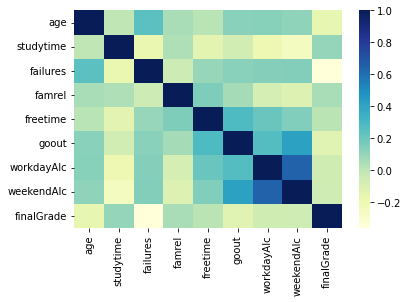

In [15]:
# The heatmap below shows the correlation between variables in the dataframe.
sns.heatmap(data.corr(), cmap="YlGnBu")

Ages range is 7 : from 15 to 22


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

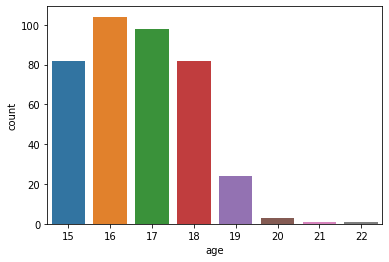

In [16]:
# We create a bargraph displaying the amount of students per age, ranging from 15-22.
ageDif = data['age'].max() - data['age'].min()
print('Ages range is', ageDif, ': from', data['age'].min(), 'to', data['age'].max())
sns.countplot(data['age'])
# Something we noticed is that due to the size of our data set, there are not many 
# data points on students age 20-22 which we will have to address later.

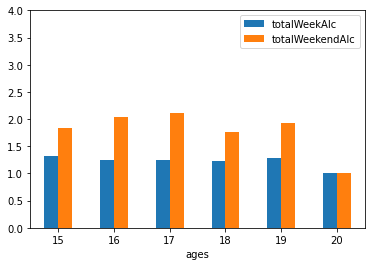

In [17]:
# Here, we show the average weekday and weekend alcohol consumption per 
# age for females in a bar graph. The graph shows that weekend alcohol 
# consumption is generally higher overall, but the difference begins 
# to  decline later on. 
import numpy as np
Age=np.asarray(fData['age'])
fData['age'].value_counts()
totalWeekAlc = [0.0,0.0,0.0,0.0,0.0,0.0]
totalWeekendAlc = [0.0,0.0,0.0,0.0,0.0,0.0]
for index, row in fData.iterrows():
    if row['age'] == 15:
        totalWeekAlc[0] +=row['workdayAlc']
        totalWeekendAlc[0] +=row['weekendAlc']
    elif row['age'] == 16:
        totalWeekAlc[1] +=row['workdayAlc']
        totalWeekendAlc[1] +=row['weekendAlc']
    elif row['age'] == 17:
        totalWeekAlc[2] +=row['workdayAlc']
        totalWeekendAlc[2] +=row['weekendAlc']
    elif row['age'] == 18:
        totalWeekAlc[3] +=row['workdayAlc']
        totalWeekendAlc[3] +=row['weekendAlc']
    elif row['age'] == 19:
        totalWeekAlc[4] +=row['workdayAlc']
        totalWeekendAlc[4] +=row['weekendAlc']
    elif row['age'] == 20:
        totalWeekAlc[5] +=row['workdayAlc']
        totalWeekendAlc[5] +=row['weekendAlc']
        
totalWeekAlc[0] /= 38
totalWeekAlc[1] /= 54
totalWeekAlc[2] /= 58
totalWeekAlc[3] /= 43
totalWeekAlc[4] /= 14
totalWeekAlc[5] /= 1
totalWeekendAlc[0] /= 38
totalWeekendAlc[1] /= 54
totalWeekendAlc[2] /= 58
totalWeekendAlc[3] /= 43
totalWeekendAlc[4] /= 14
totalWeekendAlc[5] /= 1
#print(totalWeekAlc)
#print(totalWeekendAlc)
fAlc = pd.DataFrame()
fAlc['totalWeekAlc'] = totalWeekAlc
fAlc['totalWeekendAlc'] = totalWeekendAlc
fAlc['ages'] = [15, 16, 17, 18, 19, 20]

ax = fAlc.plot.bar(x='ages', ylim=(0,4),rot=0)

In [18]:
mData['age'].value_counts()

16    50
15    44
17    40
18    39
19    10
20     2
22     1
21     1
Name: age, dtype: int64

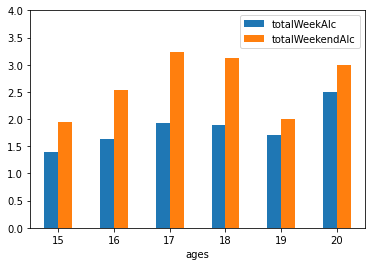

In [19]:
# Here, we show the average weekday and weekend alcohol consumption per 
# age for males in a bar graph. The graph shows a higher average consumption 
# than females, but displays a similar trend
Age=np.asarray(mData['age'])
mData['age'].value_counts()
totalWeekAlc = [0.0,0.0,0.0,0.0,0.0,0.0]
totalWeekendAlc = [0.0,0.0,0.0,0.0,0.0,0.0]
for index, row in mData.iterrows():
    if row['age'] == 15:
        totalWeekAlc[0] +=row['workdayAlc']
        totalWeekendAlc[0] +=row['weekendAlc']
    elif row['age'] == 16:
        totalWeekAlc[1] +=row['workdayAlc']
        totalWeekendAlc[1] +=row['weekendAlc']
    elif row['age'] == 17:
        totalWeekAlc[2] +=row['workdayAlc']
        totalWeekendAlc[2] +=row['weekendAlc']
    elif row['age'] == 18:
        totalWeekAlc[3] +=row['workdayAlc']
        totalWeekendAlc[3] +=row['weekendAlc']
    elif row['age'] == 19:
        totalWeekAlc[4] +=row['workdayAlc']
        totalWeekendAlc[4] +=row['weekendAlc']
    elif row['age'] == 20:
        totalWeekAlc[5] +=row['workdayAlc']
        totalWeekendAlc[5] +=row['weekendAlc']
    
totalWeekAlc[0] /= 44
totalWeekAlc[1] /= 50
totalWeekAlc[2] /= 40
totalWeekAlc[3] /= 39
totalWeekAlc[4] /= 10
totalWeekAlc[5] /= 2
totalWeekendAlc[0] /= 44
totalWeekendAlc[1] /= 50
totalWeekendAlc[2] /= 40
totalWeekendAlc[3] /= 39
totalWeekendAlc[4] /= 10
totalWeekendAlc[5] /= 2
mAlc = pd.DataFrame()
mAlc['totalWeekAlc'] = totalWeekAlc
mAlc['totalWeekendAlc'] = totalWeekendAlc
mAlc['ages'] = [15, 16, 17, 18, 19, 20]
ax = mAlc.plot.bar(x='ages', ylim=(0,4),rot=0)

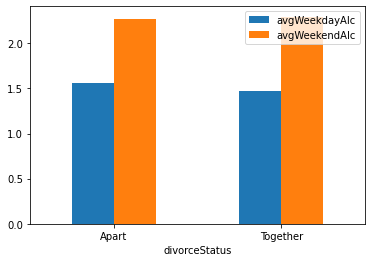

In [20]:
# Here, we show a bar graph of average weekday and weekend alcohol consumption 
# for students with and without divorced parents. The data shows only slightly 
# higher averages for students with divorced parents, suggesting that there may 
# not be a very strong correlation in parental divorce status and drinking habits.
avgWeekdayAlc = [0.0,0.0]
avgWeekendAlc = [0.0,0.0]
totalTogether = data['parentDivorceStatus'].sum()
for index, row in data.iterrows():
    if row['parentDivorceStatus'] == 0:
        avgWeekdayAlc[0] +=row['workdayAlc']
        avgWeekendAlc[0] +=row['weekendAlc']
    elif row['parentDivorceStatus'] == 1:
        avgWeekdayAlc[1] +=row['workdayAlc']
        avgWeekendAlc[1] +=row['weekendAlc']

avgWeekdayAlc[0]/=(395-totalTogether)
avgWeekendAlc[0]/=(395-totalTogether)
avgWeekdayAlc[1]/=totalTogether
avgWeekendAlc[1]/=totalTogether

divAlc = pd.DataFrame()
divAlc['avgWeekdayAlc'] = avgWeekdayAlc
divAlc['avgWeekendAlc'] = avgWeekendAlc
divAlc['divorceStatus'] = ['Apart','Together']
divAlc
ax = divAlc.plot.bar(x='divorceStatus', rot=0)

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: finalGrade, dtype: int64


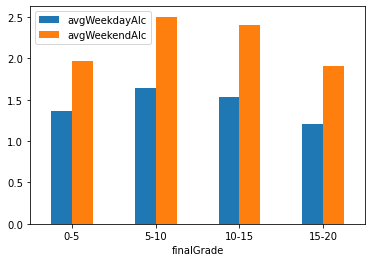

In [21]:

# Here, we show a bar graph of average weekday and weekend alcohol consumption 
# for different final grade ranges. We split grades into ranges [0-5),[5-10),
# [10,15),[15,20]. The individuals with the grades between 5-10 tend to drink
# the most, and 10-15 at the second most. This may lead us to believe the people 
# with the lower grades drink more.
print(data['finalGrade'].value_counts())
avgWeekdayAlc = [0.0,0.0,0.0,0.0]
avgWeekendAlc = [0.0,0.0,0.0,0.0]

totalRange1 = 38+1
totalRange2 = 7+15+9+32+28
totalRange3 = 56+47+31+31+27
totalRange4 = 33+16+6+12+5+1

for index, row in data.iterrows():
    if row['finalGrade'] < 5:
        avgWeekdayAlc[0] += row['workdayAlc']
        avgWeekendAlc[0] += row['weekendAlc']
    elif row['finalGrade'] < 10:
        avgWeekdayAlc[1] +=row['workdayAlc']
        avgWeekendAlc[1] +=row['weekendAlc']
    elif row['finalGrade'] < 15:
        avgWeekdayAlc[2] +=row['workdayAlc']
        avgWeekendAlc[2] +=row['weekendAlc']
    elif row['finalGrade'] <= 20:
        avgWeekdayAlc[3] +=row['workdayAlc']
        avgWeekendAlc[3] +=row['weekendAlc']

avgWeekdayAlc[0]/= totalRange1
avgWeekendAlc[0]/= totalRange1
avgWeekdayAlc[1]/= totalRange2
avgWeekendAlc[1]/= totalRange2
avgWeekdayAlc[2]/= totalRange3
avgWeekendAlc[2]/= totalRange3
avgWeekdayAlc[3]/= totalRange4
avgWeekendAlc[3]/= totalRange4

finGradeAlc = pd.DataFrame()
finGradeAlc['avgWeekdayAlc'] = avgWeekdayAlc
finGradeAlc['avgWeekendAlc'] = avgWeekendAlc
finGradeAlc['finalGrade'] = ['0-5','5-10','10-15','15-20']
finGradeAlc
ax = finGradeAlc.plot.bar(x='finalGrade', rot=0)

3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64


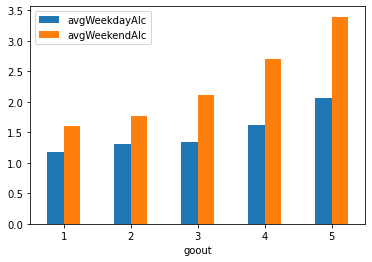

In [22]:
# This graph shows the relationship between going out and alcohol consumption.
# This graph has a much more linear relationship between the the rate of going
# out and alcohol consumption. 
print(data['goout'].value_counts())
avgWeekdayAlc = [0.0,0.0,0.0,0.0,0.0]
avgWeekendAlc = [0.0,0.0,0.0,0.0,0.0]

for index, row in data.iterrows():
    if row['goout'] == 1:
        avgWeekdayAlc[0] += row['workdayAlc']
        avgWeekendAlc[0] += row['weekendAlc']
    elif row['goout'] == 2:
        avgWeekdayAlc[1] +=row['workdayAlc']
        avgWeekendAlc[1] +=row['weekendAlc']
    elif row['goout'] ==3:
        avgWeekdayAlc[2] +=row['workdayAlc']
        avgWeekendAlc[2] +=row['weekendAlc']
    elif row['goout'] ==4:
        avgWeekdayAlc[3] +=row['workdayAlc']
        avgWeekendAlc[3] +=row['weekendAlc']
    elif row['goout'] ==5:
        avgWeekdayAlc[4] +=row['workdayAlc']
        avgWeekendAlc[4] +=row['weekendAlc']

avgWeekdayAlc[0]/= 23
avgWeekendAlc[0]/= 23
avgWeekdayAlc[1]/= 103
avgWeekendAlc[1]/= 103
avgWeekdayAlc[2]/= 130
avgWeekendAlc[2]/= 130
avgWeekdayAlc[3]/= 86
avgWeekendAlc[3]/= 86
avgWeekdayAlc[4]/= 53
avgWeekendAlc[4]/= 53

goOutAlc = pd.DataFrame()
goOutAlc['avgWeekdayAlc'] = avgWeekdayAlc
goOutAlc['avgWeekendAlc'] = avgWeekendAlc
goOutAlc['goout'] = [1,2,3,4,5]
goOutAlc
ax = goOutAlc.plot.bar(x='goout', rot=0)

In [23]:
# Part 4
# Our null hypothesis was that there is no correlation between separated parents and higher
# alcohol consumption, and that there is no correlation between poor academics and higher
# alcohol consumption.
# Based on the data we analyzed, we cannot reject the null hypothesis as the results are not 
# significant enough.
# We decided to try out data on a random forest regressor and find the mean squared error.
# We also decided to find the mean squared error for SVM regression to see if there was a 
# difference. We used the parent divorce status data on the weekend alcohol consumption. 
# When we ran the tr

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.svm import SVR
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import make_pipeline

X = np.array(data['parentDivorceStatus']).reshape((-1, 1))
y = np.array(data['weekendAlc'])
X = scale(X)
y = scale(y)

# Predicting the alcohol consumption given the divorce status.
# Splitting data so I can do holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)
# Getting the model
regressor = RandomForestRegressor(max_depth = 4, random_state = 0)
# Fitting the model (training)
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction),2))

# Other model
f = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
f.fit(X_train, y_train)
m = f.predict(X_test)
print("Mean squared error for SVM Regression=", round(sm.mean_squared_error(y_test, m), 2))
# I decided to experiment with different hyperparameters. For the random forest I decided to change
# the max_depth to try and find the best option to avoid over and under fitting. In the SVM I changed
# epsilon around a bit to achieve the same goal. When we ran the first model we got the mean squared 
# error at 0.97. When we ran it with the SVM Regression it actually decreased in quality, by 0.02. 


X = np.array(data['finalGrade']).reshape((-1, 1))
y = np.array(data['weekendAlc'])
X = scale(X)
y = scale(y)

# Predicting the alcohol consumption given the final grade.
# Splitting data so I can do holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)
# Getting the model
regressor = RandomForestRegressor(max_depth = 4, random_state = 0)
# Fitting the model (training)
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction),2))

# Other model
f = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
f.fit(X_train, y_train)
m = f.predict(X_test)
print("Mean squared error for SVM Regression=", round(sm.mean_squared_error(y_test, m), 2))
# I decided to experiment with different hyperparameters. For the random forest I decided to change
# the max_depth to try and find the best option to avoid over and under fitting. In the SVM I changed
# epsilon around a bit to achieve the same goal. When we ran the first model we got the mean squared 
# error at 0.92. When we ran it with the SVM Regression it increased in quality, by 0.02. 

Mean squared error = 0.97
Mean squared error for SVM Regression= 0.95
Mean squared error = 0.92
Mean squared error for SVM Regression= 0.94


In [24]:
# Part 5
# Analyzing Findings
# After doing extensive analysis on the data by taking summary statistics, comparing data points
# in graphs, examining the correlation between data points, and finding the mean squared error
# and the mean squared error for SVM Regression, we can make some conclusions.
# Although it was not part of our initial plan, we did observe some differences between male and 
# female alcohol consumption. First, there is about a 0.6 difference between male and female 
# alcohol consumption on both the workday and weekend. However, there are about the same patterns 
# seen in each age group in both males and females. There is a increasing trend from age 15 to 17, 
# peaking at 17, then it falls slightly at 18 and generally decreases after that. Regarding parent
# status, there was nearly no difference between students with divorced parents and alcohol consumption.
# We also noticed that students with the second lowest grades had the higher alcohol consumption, 
# followed by the third lowest grades, followed by the lowest grades, and finally the highest grades. 
# This somewhat followed our predictions, however it was not expected that the students with the 
# lowest grades had the second lowest alcohol consumption. We predict that this may be a result of 
# another factor; low internet access. Finally, we looked at the relationship between students that
# go out more and alcohol consumption. This was a clear linear increase between going out and increased
# alcohol consumption. This can be seen on the heat map as well, with that section colored the darkest,
# indicating higher correlation. 
# When we looked at the mean square error, there we chose to examine alcohol consumption on parent 
# divorce status and final grades. In each case the value was close to 1, indicating that there was not
# much error in our data set. We chose to use mean square error to eliminate effects of a few outliers.
# So, there are a few conclusions we have drawn from our analysis. First, while there may be a relationship
# between trauma and stress at a young age and higher alcohol consumption, this does not simply come from 
# separated parents. Also, although there was a bit of a trend of students with lower grades having higher
# alcohol consumption, it is still the case that students with high grades can have high alcohol 
# consumption. This biggest relationship we found that lead to higher alcohol consumption was how often
# a student went out. Going out more directly related to higher alcohol consumption, so this is definitely
# something to look out for.

# Evaluating our Data Set
# Once we got into the fine details of our data set we realized that it would have been a bit more helpful
# to have a larger data set. A set with around 400 students was not enough because while there were a lot
# of students in the 15-19 range, there were almost none in the 20-22 range so it was impossible to make 
# conclusions about that group. In the future we would like to see more data points. However, it was useful
# having so many categories to choose from when thinking of what we want to compare to higher alcohol 
# consumption. 

# At the end of this we hope that you have learned a bit more about the data science pipeline. This process
# can repeated on most datasets so that you can ultimately learn more about the data set and be able to 
# effectively present the information to other people with numbers, visuals, and explanations.